In [1]:
import numpy as np
import pandas as pd
import unicodedata
import re
import matplotlib as plt
import seaborn as sns

# Uncomment to see full cell text
pd.set_option('display.max_colwidth', 0)

raw = pd.read_excel("../data/raw/inquire-boulder-faq-text/inquire-boulder-active-faqs-2019-01-02.xls.xlsx")
faq = raw.drop(labels=('Active'), axis=1).dropna()

In [2]:
raw.set_index(keys=['Department', 'Category', 'Topic']).sort_index().drop(labels=('Active'), axis=1).dropna()

FAQ  \
Department          Category                                              Topic                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [4]:
faq['length'] = faq.FAQ.apply(lambda x: len(x))

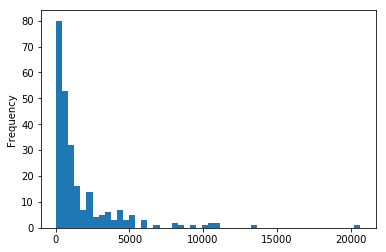

In [5]:
faq.length.plot(kind='hist', bins=50)

In [11]:
faq[faq['length'] == faq['length'].max()]

Topic Category                            Department  \
147  Mountain Lions  Animals  Planning Housing and Sustainability    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

So, there seems to be a lot demand for info about local mountain lions!